# Linear Regression & Logistic Regression
---
#### Name: 劉耀文 (Yao-Wen Liu)
#### Student ID: 0716236
---

## Import needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

# Linear Regression
## 1. Data Generation
* Use random.uniform() in numpy to generate 1000 points
* Use random.normal() in numpy to generate 1000 points from normal distribution
* Use scatter() in matplotlib to draw scatter plot of X and Y

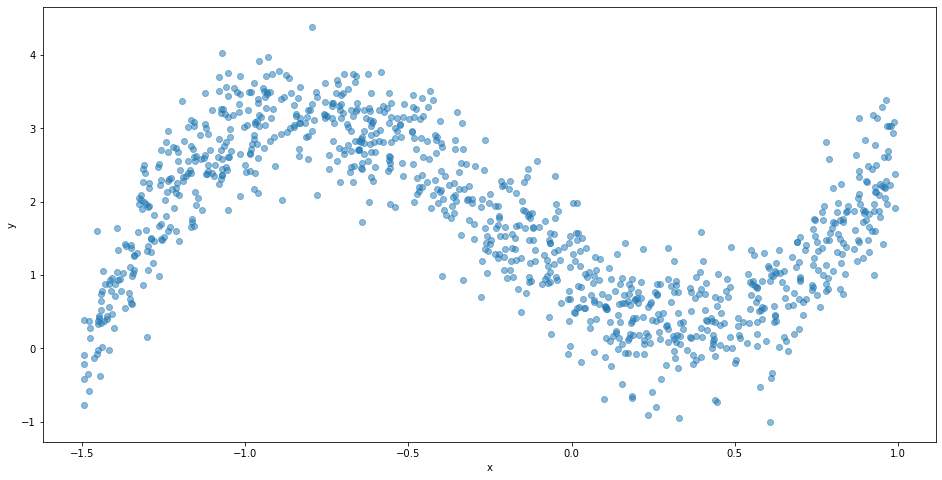

In [2]:
X = np.random.uniform(low=-1.5,high=1.0,size=(1000,))
Y = 3*(X ** 3) + 2*(X ** 2) - 3 *  X + 1 + np.random.normal(0, 0.5, 1000)
plt.figure(figsize=(16, 8))
plt.scatter(X, Y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 2. Data Preprocessing
* PolynomialFeatures() in scikit-learn to Generate degree-K polynomial features

In [3]:
X = X.reshape(-1,1)
X_hat = []
for i in range(1,5):
    poly = PolynomialFeatures(i)
    X_hat.append(poly.fit_transform(X))

## 3. Model Construction
* Use LinearRegression() in scikit-learn as the training model
* Get fitted weight from attributes coef_(for x^1~x^4) and intercept_(for x^0)

In [4]:
Y_hat=[]
coef=[]
for i in range(0,4):
    reg = LinearRegression().fit(X_hat[i], Y)
    Y_hat.append(reg.predict(X_hat[i]))
    tmp=reg.coef_
    tmp[0]=reg.intercept_
    coef.append(reg.coef_)

## 4. Validation
#### No need to implement

## 5. Results
* Use scatter() in matplotlib to draw the results and predicted y in same figure

Degree 1 fitted weights:[ 1.54223728 -0.62672911]
Degree 1 fitted equation: 1.54-0.63x

Degree 2 fitted weights:[ 1.64290433 -0.73470731 -0.21626006]
Degree 2 fitted equation: 1.64-0.73x-0.22x^2

Degree 3 fitted weights:[ 1.00313959 -3.06729431  1.9765347   3.02842358]
Degree 3 fitted equation: 1.0-3.07x1.98x^2+3.03x^3

Degree 4 fitted weights:[ 0.9801381  -2.95488721  2.1530767   2.84700797 -0.18237253]
Degree 4 fitted equation: 0.98-2.95x2.15x^2+2.85+x^3-0.18x^4



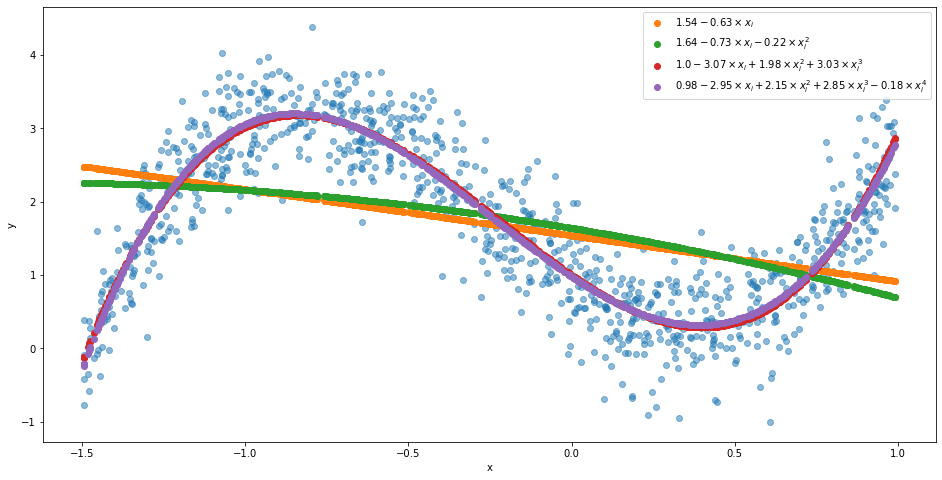

In [5]:
print(f'Degree 1 fitted weights:{coef[0]}')
print(f'Degree 1 fitted equation: {round(coef[0][0],2)}{round(coef[0][1],2)}x\n')
print(f'Degree 2 fitted weights:{coef[1]}')
print(f'Degree 2 fitted equation: {round(coef[1][0],2)}{round(coef[1][1],2)}x{round(coef[1][2],2)}x^2\n')
print(f'Degree 3 fitted weights:{coef[2]}')
print(f'Degree 3 fitted equation: {round(coef[2][0],2)}{round(coef[2][1],2)}x{round(coef[2][2],2)}x^2+{round(coef[2][3],2)}x^3\n')
print(f'Degree 4 fitted weights:{coef[3]}')
print(f'Degree 4 fitted equation: {round(coef[3][0],2)}{round(coef[3][1],2)}x{round(coef[3][2],2)}x^2+{round(coef[3][3],2)}+x^3{round(coef[3][4],2)}x^4\n')

plt.figure(figsize=(16, 8))
plt.scatter(X, Y, alpha=0.5)
plt.scatter(X, Y_hat[0], label=r'${}{}\times x_i$'.format(round(coef[0][0],2),round(coef[0][1],2)))
plt.scatter(X, Y_hat[1], label=r'${}{}\times x_i{}\times x_i^2$'.format(round(coef[1][0],2),round(coef[1][1],2),round(coef[1][2],2)))
plt.scatter(X, Y_hat[2], label=r'${}{}\times x_i+{}\times x_i^2+{}\times x_i^3$'.format(round(coef[2][0],2),round(coef[2][1],2),round(coef[2][2],2),round(coef[2][3],2)))
plt.scatter(X, Y_hat[3], label=r'${}{}\times x_i+{}\times x_i^2+{}\times x_i^3{}\times x_i^4$'.format(round(coef[3][0],2),round(coef[3][1],2),round(coef[3][2],2),round(coef[3][3],2),round(coef[3][4],2)))

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Logistic Regression
## 1. Data Generation
* Use random.randint() in numpy to random select 0 or 1 as yi for every point
* Use random.multivariate_normal() in numpy to generate xi0 and xi1
* Use scatter() in matplotlib to draw scatter plot of Xi0, Xi1 and Y

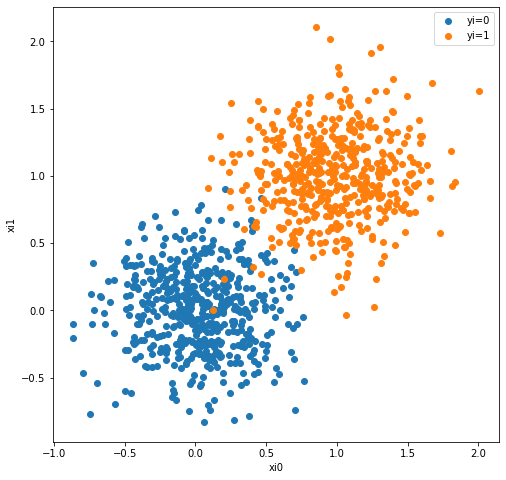

In [6]:
logi_X=[]
logi_Y=[]
for i in range(0,1000):
    yi=np.random.randint(0,2)
    logi_Y.append(yi)
    xi = np.random.multivariate_normal([yi,yi], [[0.1,0],[0,0.1]],1)[0]
    logi_X.append([1,xi[0],xi[1]])
logi_X=np.array(logi_X)
logi_Y=np.array(logi_Y)
plt.figure(figsize=(8, 8))
for i in range(0,2):
    index = np.where(logi_Y == i)
    plt.scatter(logi_X[index,1], logi_X[index,2], label=f'yi={i}')

plt.xlabel("xi0")
plt.ylabel("xi1")
plt.legend()
plt.show()

## 2. Model Construction
* Use LogisticRegression(penalty='l2') in scikit-learn as the training model

In [7]:
logi_reg = LogisticRegression(penalty='l2').fit(logi_X, logi_Y)

## 3. Validation
#### No need to implement

## 4. Results
* Use score() of object logi_reg to get the model accuracy
* Get fitted weight from attributes coef_(for xi0 and xi1) and intercept_(for 1)
* Use pcolormesh() and scatter() in matplotlib to draw the decision boundary of model

Model accuracy: 0.987
Model weights and the corresponded terms: yi=L(-5.1 + 5.21xi0 + 5.16xi1)


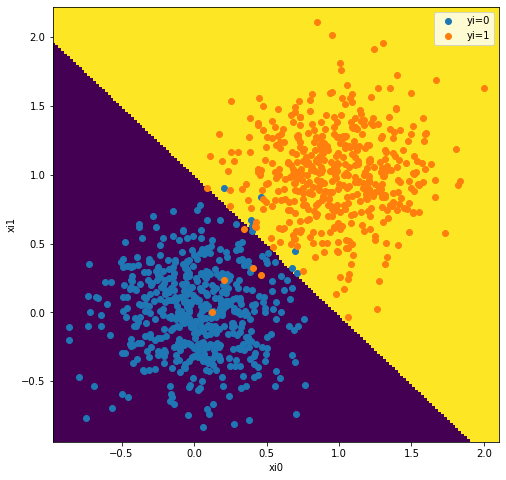

In [8]:
print(f'Model accuracy: {logi_reg.score(logi_X,logi_Y)}')
print(f'Model weights and the corresponded terms: yi=L({round(logi_reg.intercept_[0],2)} + {round(logi_reg.coef_[0,1],2)}xi0 + {round(logi_reg.coef_[0,2],2)}xi1)')

# this part refer to https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
x_min, x_max = logi_X[:, 1].min() - 0.1, logi_X[:, 1].max() + 0.1
y_min, y_max = logi_X[:, 2].min() - 0.1, logi_X[:, 2].max() + 0.1
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logi_reg.predict(np.c_[[1]*len(xx.ravel()),xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, shading='auto')
for i in range(0,2):
    index = np.where(logi_Y == i)
    plt.scatter(logi_X[index,1], logi_X[index,2], marker='o',label=f'yi={i}')

plt.xlabel("xi0")
plt.ylabel("xi1")
plt.legend()
plt.show()